# Product Review Analysis

In [47]:
# initial preprocessing ....first we have to do initial preprocessing bcoz we have data here with diff diff language

## Importing Libraries

In [13]:
 pip install googletrans==3.1.0a0

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd 
from langdetect import detect 
#pip install langdetect
## It supports around 55 languages
##it will give predictions in codes
from googletrans import Translator 
# pip install googletrans==3.1.0a0
import seaborn as sns
import matplotlib.pyplot as plt



- langdetect library : langdetect is a Python library used for language detection. It can automatically detect the language of a given text or document..it supports arround 55 languages..it has code for every language.

- googletrans:
  googletrans is a Python library that provides a simple interface to Google Translate API for performing language translation. It       allows you to translate text from one language to another using Google Translate.

## Loading dataset

In [15]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\Product-Sentiment-Analysis\Product_Review_data.csv")
data.head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


# Dataset Understanding

- review_id:    Unique identifier for each review.

- product_id:   Unique identifier for the product being reviewed.

- reviewer_id:  Unique identifier for the reviewer.

- stars:        The rating given by the reviewer (usually ranging from 1 to 5).

- review_body:  The text of the review itself, where the reviewer shares their feedback or experience.

- review_title: The title or summary of the review.

- language:      The language of the review (e.g., "es" for Spanish).

- product_category: The category to which the product belongs (e.g., "electronics", "drugstore", "wireless", "shoes").

# EDA

Before go with text analysis we can do common analysis on product categories, stars to see product performance and customer preferances and satisfaction.

### Point 1: Product Performance

In [16]:
product_performance = data.groupby('product_category')['stars'].mean()
print("Product Performance (Average Star Ratings):")
print(product_performance)

Product Performance (Average Star Ratings):
product_category
apparel                     2.866829
automotive                  2.950721
baby_product                3.089326
beauty                      2.935805
book                        3.399316
camera                      3.109277
digital_ebook_purchase      3.357027
drugstore                   3.010521
electronics                 2.887626
furniture                   3.048958
grocery                     3.147510
home                        2.980380
home_improvement            3.036584
industrial_supplies         3.078947
jewelry                     2.930538
kitchen                     3.016281
lawn_and_garden             2.773189
luggage                     3.293570
musical_instruments         3.225490
office_product              3.086565
other                       3.079756
pc                          3.062550
personal_care_appliances    3.022950
pet_products                2.991112
shoes                       3.109296
sports        

### Point 2: Customer Satisfaction

In [18]:

customer_satisfaction = data.groupby('product_category')['stars'].value_counts(normalize=True).unstack()
print("Customer Satisfaction (Normalized Count of Star Ratings):")
print(customer_satisfaction)

Customer Satisfaction (Normalized Count of Star Ratings):
stars                            1         2         3         4         5
product_category                                                          
apparel                   0.221893  0.210040  0.209169  0.197141  0.161757
automotive                0.212096  0.194456  0.207896  0.201736  0.183816
baby_product              0.170047  0.197705  0.216349  0.204671  0.211227
beauty                    0.210713  0.208123  0.209759  0.177457  0.193948
book                      0.125190  0.170213  0.189590  0.210106  0.304901
camera                    0.176956  0.186200  0.199406  0.225487  0.211951
digital_ebook_purchase    0.098752  0.172545  0.240369  0.249593  0.238741
drugstore                 0.202612  0.197352  0.199710  0.187557  0.212770
electronics               0.231295  0.210688  0.183149  0.188830  0.186038
furniture                 0.173264  0.200038  0.215911  0.226047  0.184739
grocery                   0.168582  0.1934

### Point 3: Product Categories

In [19]:

category_distribution = data['product_category'].value_counts()
print("Product Category Distribution:")
print(category_distribution)


Product Category Distribution:
product_category
home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490


### Text Processing

In [6]:
##here we reviews in multiple langauges 
## here we are mainly focusing on review and stars so first of all we extract that 2 columns only from dataset.
## so first we have to detect languages from rivew and then we have to translate it.

In [20]:
data = data[['review_body','stars']]

In [21]:
data

,review_body,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,1
1,"Horrible, nos tuvimos que comprar otro porque ...",1
2,Te obligan a comprar dos unidades y te llega s...,1
3,"No entro en descalificar al vendedor, solo pue...",1
4,Llega tarde y co la talla equivocada,1
...,...,...
199995,Mando funciona perfectamente y cumple con toda...,5
199996,"Compré la batería con cierta reticencia, pero ...",5
199997,Buena calidad. Satisfecha con la compra.,5
199998,Perfecto para el cumple de mi hijo,5


In [22]:
data.shape

(200000, 2)

In [23]:
sample = data.sample(1000)
sample

,review_body,stars
54282,Las cuentas son demasiado grandes La verdad pa...,2
7588,Se rompió el primer día. No vale la pena. Muy ...,1
97812,Van nada más que regular algunas salen buenas ...,3
2222,"Pésimo. Malísimo, leí los comentarios de los u...",1
27934,Bajísima calidad. No corresponde calidad-precio.,1
...,...,...
140776,"Creo q va muy bien por ahora, es cómoda, fácil...",4
94217,No es lo que esperaba,3
95117,He hecho la prueba para ver la cantidad de pel...,3
126346,Buena nitidez y buen color de imagen. Peso lig...,4


In [24]:
sample.reset_index(drop=True,inplace=True)

In [25]:
sample

,review_body,stars
0,Las cuentas son demasiado grandes La verdad pa...,2
1,Se rompió el primer día. No vale la pena. Muy ...,1
2,Van nada más que regular algunas salen buenas ...,3
3,"Pésimo. Malísimo, leí los comentarios de los u...",1
4,Bajísima calidad. No corresponde calidad-precio.,1
...,...,...
995,"Creo q va muy bien por ahora, es cómoda, fácil...",4
996,No es lo que esperaba,3
997,He hecho la prueba para ver la cantidad de pel...,3
998,Buena nitidez y buen color de imagen. Peso lig...,4


In [26]:
# lang detection 
def lang_detect(data):
    lang = detect(data)
    return lang

In [14]:
## lang detector and google translator takes lots of time.so for that we take only random sample of 1000

In [27]:
sample['language'] = sample.review_body.apply(lang_detect)
sample

,review_body,stars,language
0,Las cuentas son demasiado grandes La verdad pa...,2,es
1,Se rompió el primer día. No vale la pena. Muy ...,1,es
2,Van nada más que regular algunas salen buenas ...,3,es
3,"Pésimo. Malísimo, leí los comentarios de los u...",1,es
4,Bajísima calidad. No corresponde calidad-precio.,1,es
...,...,...,...
995,"Creo q va muy bien por ahora, es cómoda, fácil...",4,es
996,No es lo que esperaba,3,es
997,He hecho la prueba para ver la cantidad de pel...,3,es
998,Buena nitidez y buen color de imagen. Peso lig...,4,es


In [28]:
sample.language.value_counts()

language
es    983
pt     11
ca      2
vi      1
en      1
de      1
it      1
Name: count, dtype: int64

In [29]:
from googletrans import Translator 

In [30]:
# translator 
def lang_translator(data):
    translator = Translator()
    translated_text = translator.translate(data)
    return translated_text.text

In [31]:
sample.review_body[1]

'Se rompió el primer día. No vale la pena. Muy pequeño. La cremallera se atasca.'

In [32]:
lang_translator(sample.review_body[1])

'It broke the first day. Not worth it. Very small. The zipper gets stuck.'

In [33]:
sample['translated_review'] = sample.review_body.apply(lang_translator)

In [34]:
sample.to_csv(r"translated_review.csv")

In [35]:
sample

,review_body,stars,language,translated_review
0,Las cuentas son demasiado grandes La verdad pa...,2,es,"The beads are too big. The truth is, for my ta..."
1,Se rompió el primer día. No vale la pena. Muy ...,1,es,It broke the first day. Not worth it. Very sma...
2,Van nada más que regular algunas salen buenas ...,3,es,"They are nothing more than average, some come ..."
3,"Pésimo. Malísimo, leí los comentarios de los u...",1,es,"Appalling. Terrible, I read the user comments ..."
4,Bajísima calidad. No corresponde calidad-precio.,1,es,Very low quality. Price-quality does not corre...
...,...,...,...,...
995,"Creo q va muy bien por ahora, es cómoda, fácil...",4,es,"I think it's going very well for now, it's com..."
996,No es lo que esperaba,3,es,That's not what I expected
997,He hecho la prueba para ver la cantidad de pel...,3,es,I have done the test to see the amount of natu...
998,Buena nitidez y buen color de imagen. Peso lig...,4,es,Good sharpness and good image color. Light wei...


### Point 4: Product Quality and Reliability

In [36]:

product_quality = sample[sample['translated_review'].str.contains('defect|malfunction|poor quality', case=False)]
print("Product Quality and Reliability (Reviews with Quality Issues):")
print(product_quality["translated_review"])

Product Quality and Reliability (Reviews with Quality Issues):
30     Unable to set the alarm with the instructions,...
72     A disappointment . The product is not the one ...
91     The truth is that they are not what I expected...
118    The product is of very poor quality, and it st...
314    After 24 hours it was already losing water thr...
357    Barely a year has passed and the panel already...
391    I just have to say that I have not been able t...
400    Garbage, the connection, the flexible, everyth...
418    It has gone wrong or is defective. On the seco...
472     It had some defects in the rubber of the closure
547    Poor quality, poor shoulder opening, poor fit....
581    I ordered this watch as a gift for my father b...
609    Defective product, button that does not stop t...
692    Not only does it not provide super fast chargi...
718    Poor quality, the wood cracks when inserting t...
730    Poor quality I ended up not using them because...
743    Very versatile and

In [37]:
!pip install contractions

In [25]:
# ngrams 
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter ##particitem counts..its a handy library we dnt have to code
## simply we give list to the counter and it will count the unique words in alist
from string import punctuation
from nltk.corpus import stopwords
import contractions

In [26]:
def get_ngrams(data,ngram_range):
# in word2vec we have given data in nasted list format
## here we give tokens -
   # tokens = word_tokenize(data)
    ngram_list = ngrams(data,ngram_range)
    final_ngrams = []
    for i in ngram_list:
        if ngram_range==1 :
            final_ngrams.append(i[0])
        elif ngram_range==2 :
            final_ngrams.append(" ".join([i[0],i[1]]))
        elif ngram_range==3 :
            final_ngrams.append(" ".join([i[0],i[1],i[2]]))
    return final_ngrams

In [27]:
unigrams=sample.translated_review.apply(lambda x: get_ngrams(x,1))

In [29]:
unigrams

0      [P, r, o, d, u, c, t,  , j, u, s, t,  , l, i, ...
1      [W, h, a, t,  , I,  , d, i, d, n, ', t,  , l, ...
2      [W, h, i, l, e,  , i, t,  , l, a, s, t, e, d, ...
3      [T, h, i, s,  , F, u, n, k, o,  , p, o, p,  , ...
4      [I, t, ', s,  , w, h, a, t,  , I,  , w, a, s, ...
                             ...                        
995    [N, o, t,  , b, a, d,  , f, o, r,  , t, h, e, ...
996    [T, h, e, y,  , b, r, e, a, k,  , d, u, e,  , ...
997    [I, n, t, e, n, s, e,  , h, y, d, r, a, t, i, ...
998    [I, t, ', s,  , n, o, t,  , b, a, d, ,,  , t, ...
999    [J, u, n, e,  , &,  , E, d,  , s, u, r, p, r, ...
Name: translated_review, Length: 1000, dtype: object

In [30]:
bigrams=sample.translated_review.apply(lambda x: get_ngrams(x,2))

In [31]:
bigrams

0      [T h, h e, e  ,   p, p r, r o, o t, t e, e c, ...
1      [A  ,   l, l i, i t, t t, t l, l e, e  ,   g, ...
2      [I n, n  ,   t, t e, e r, r m, m s, s  ,   o, ...
3      [I  ,   h, h a, a v, v e, e  ,   n, n o, o t, ...
4      [T h, h e, e  ,   b, b o, o x, x  ,   c, c o, ...
                             ...                        
995    [O k, k ,, ,  ,   a, a l, l t, t h, h o, o u, ...
996    [W e, e l, l l, l ,, ,  ,   i, i t, t  ,   f, ...
997    [W e, e l, l l, l ., .  ,   I, I  ,   d, d o, ...
998    [T h, h e, e y, y  ,   s, s e, e l, l l, l  , ...
999    [I t, t  ,   t, t a, a s, s t, t e, e s, s  , ...
Name: translated_review, Length: 1000, dtype: object

In [32]:
final_unigrams=[]
for i in unigrams:
    final_unigrams.extend(i)
final_unigrams   

['T',
 'h',
 'e',
 ' ',
 'p',
 'r',
 'o',
 't',
 'e',
 'c',
 't',
 'i',
 'o',
 'n',
 's',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'v',
 'e',
 'r',
 'y',
 ' ',
 's',
 'm',
 'a',
 'l',
 'l',
 ' ',
 'i',
 'n',
 ' ',
 's',
 'i',
 'z',
 'e',
 'A',
 ' ',
 'l',
 'i',
 't',
 't',
 'l',
 'e',
 ' ',
 'g',
 'r',
 'e',
 'a',
 's',
 'y',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'm',
 'y',
 ' ',
 't',
 'a',
 's',
 't',
 'e',
 ' ',
 'b',
 'u',
 't',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'a',
 'r',
 'o',
 'm',
 'a',
 ' ',
 's',
 'm',
 'e',
 'l',
 'l',
 's',
 ' ',
 'v',
 'e',
 'r',
 'y',
 ' ',
 'g',
 'o',
 'o',
 'd',
 'I',
 'n',
 ' ',
 't',
 'e',
 'r',
 'm',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'q',
 'u',
 'a',
 'l',
 'i',
 't',
 'y',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'p',
 'r',
 'i',
 'c',
 'e',
 ',',
 ' ',
 't',
 'h',
 'e',
 'y',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'v',
 'e',
 'r',
 'y',
 ' ',
 'g',
 'o',
 'o',
 'd',
 ' ',
 'd',
 'u',
 'e',
 ' ',
 't',
 'o',
 ' ',
 't',
 'h',
 'e',
 'i',
 'r',
 ' ',
 'c',
 'h',
 'e',
 'a',
 'p',
 ' ',
 'c'

In [36]:
cnt=Counter(final_unigrams).most_common(20)

In [37]:
cnt

[(' ', 29311),
 ('e', 14954),
 ('t', 13428),
 ('o', 9345),
 ('a', 9074),
 ('i', 8755),
 ('s', 7341),
 ('n', 7140),
 ('r', 6719),
 ('h', 6474),
 ('l', 4984),
 ('d', 4822),
 ('c', 3571),
 ('u', 3358),
 ('m', 2800),
 ('y', 2733),
 ('p', 2476),
 ('f', 2352),
 ('g', 2210),
 ('w', 2074)]

In [44]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
def expand_text(data):
    expanded_doc = contractions.fix(data)
    return expanded_doc
stopword_list = stopwords.words("english")
stopword_list.remove("not")
stopword_list.remove("no")
stopword_list.remove("nor")
def clean_data(data):
    tokens = word_tokenize(data)
    normalization = [word.lower() for word in tokens]
    remove_punct = [word for word in normalization if word not in punctuation]
    words_without_stop = [word for word in  remove_punct if word not in stopword_list]
    clean_text = [word for word in words_without_stop if len(word)>2]
    return clean_text

In [42]:
expand_text("I'dont")

"I'do not"

In [50]:
clean_data("we have enjoyed,Really not great phone in this price range.!!. Vivo brand using first time. really great experience,")

['enjoyed',
 'really',
 'not',
 'great',
 'phone',
 'price',
 'range.',
 'vivo',
 'brand',
 'using',
 'first',
 'time',
 'really',
 'great',
 'experience']

In [51]:
clean_text = sample.translated_review.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [52]:
clean_text

0                             [protections, small, size]
1           [little, greasy, taste, aroma, smells, good]
2      [terms, quality, price, good, due, cheap, cost...
3      [not, ordered, product, not, asked, continuity...
4      [box, comes, incomplete, without, presser, mad...
                             ...                        
995              [although, frames, per, line, not, fit]
996                 [well, fulfills, purpose, perfectly]
997    [well, not, use, running, square, lot, last, m...
998    [sell, case, samsung, charging, phone, remove,...
999    [tastes, good, texture, little, thick, good, o...
Name: translated_review, Length: 1000, dtype: object

In [61]:
unigrams = clean_text.apply(lambda x : get_ngrams(x,1))
final_unigrams = []
for i in unigrams:
    final_unigrams.extend(i)
cnt = Counter(final_unigrams).most_common(30)

In [62]:
final_unigrams

['protections',
 'small',
 'size',
 'little',
 'greasy',
 'taste',
 'aroma',
 'smells',
 'good',
 'terms',
 'quality',
 'price',
 'good',
 'due',
 'cheap',
 'cost',
 'month',
 'use',
 'headphones',
 'broke',
 'still',
 'recommend',
 'not',
 'ordered',
 'product',
 'not',
 'asked',
 'continuity',
 'months',
 'free',
 'offer',
 'counted',
 'one',
 'month',
 'without',
 'authorization',
 'box',
 'comes',
 'incomplete',
 'without',
 'presser',
 'made',
 'complaint',
 'not',
 'received',
 'response',
 'not',
 'recommend',
 'substitute',
 'short',
 'long',
 'bulb',
 'fog',
 'even',
 'light',
 'give',
 'fair',
 'fell',
 'first',
 'week',
 'glue',
 'top',
 'putting',
 'stickers',
 'sides',
 'complicated',
 'going',
 'try',
 'putting',
 'stickers',
 'moment',
 'not',
 'recommend',
 'parents',
 'thing',
 'happened',
 'dog',
 '\u200b\u200benjoys',
 'lot',
 'especially',
 'heat',
 'hits',
 '...',
 'takes',
 'great',
 'naps',
 'easy',
 'clean',
 'not',
 'think',
 'time',
 'returned',
 'station',
 '

In [63]:
cnt

[('not', 755),
 ('good', 281),
 ('well', 153),
 ('quality', 144),
 ('product', 136),
 ('one', 130),
 ('little', 116),
 ('like', 115),
 ('use', 111),
 ('...', 100),
 ('time', 91),
 ('price', 88),
 ('arrived', 74),
 ('bad', 71),
 ('without', 69),
 ('perfect', 69),
 ('would', 68),
 ('work', 65),
 ('recommend', 59),
 ('bought', 56),
 ('buy', 54),
 ('even', 53),
 ('works', 53),
 ('small', 52),
 ('comes', 51),
 ('lot', 50),
 ('since', 50),
 ('case', 50),
 ('put', 48),
 ('perfectly', 48)]

In [64]:
bigrams = clean_text.apply(lambda x : get_ngrams(x,2))
final_bigrams = []
for i in bigrams:
    final_bigrams.extend(i)
cnt = Counter(final_bigrams).most_common(20)
cnt

[('not work', 35),
 ('not recommend', 30),
 ('good quality', 30),
 ('not like', 30),
 ('not know', 28),
 ('not even', 23),
 ('poor quality', 17),
 ('not bad', 17),
 ('not fit', 17),
 ('works well', 16),
 ('another one', 16),
 ('good price', 15),
 ('good product', 14),
 ('quality price', 13),
 ('not received', 13),
 ('long time', 13),
 ('fits perfectly', 13),
 ('still not', 12),
 ('not give', 12),
 ('not come', 12)]

In [65]:
trigrams = clean_text.apply(lambda x : get_ngrams(x,3))
final_trigrams = []
for i in trigrams:
    final_trigrams.extend(i)
cnt = Counter(final_trigrams).most_common(20)
cnt

[('not fit well', 8),
 ('good quality price', 7),
 ('buy another one', 6),
 ('not work well', 6),
 ('good value money', 5),
 ('took long time', 5),
 ('good quality good', 4),
 ('not last long', 4),
 ('not received product', 4),
 ('not like not', 4),
 ('give one star', 3),
 ('good price quality', 3),
 ('year old son', 3),
 ('price not bad', 3),
 ('not received yet', 3),
 ('not know not', 3),
 ('little big not', 3),
 ('not completely cover', 3),
 ('still not arrived', 3),
 ('good price not', 3)]

# Wordcloud 

In [43]:
!pip install wordcloud

In [66]:
## requirements of n grams we have to give tokens  
## in we have to merge all records that we have  and after making string of that then we can give it to the wordloud
from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt
def generate_cloud(df,column):
    df_ = df[column].str.cat(sep=" ") # .cat =dataframe merge
    wordcloud = WordCloud(width=700,height=500,background_color='white',stopwords=stopword_list).generate(df_)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [40]:
!pip install --upgrade Pillow

  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



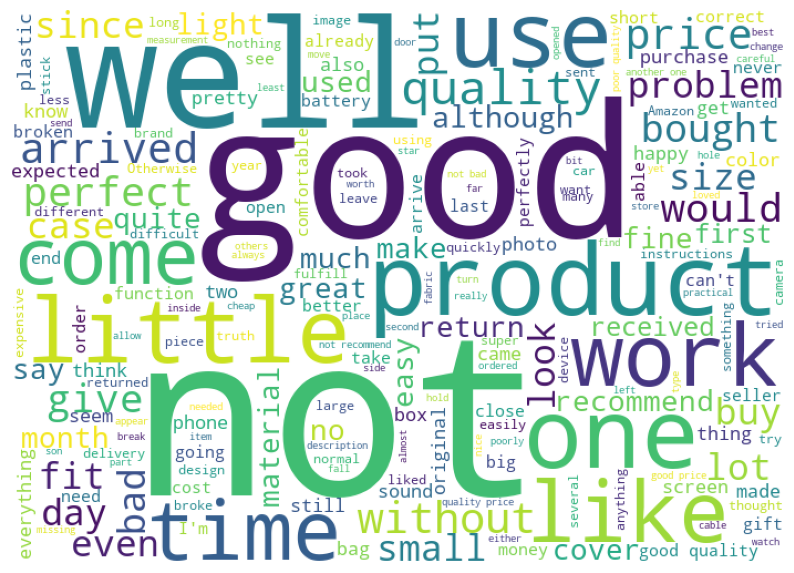

In [67]:
generate_cloud(sample,"translated_review")

# Text Vectorization

In [69]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ----------------------- -------------- 174.1/282.6 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 4.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
import contractions
from unidecode import unidecode
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [71]:
data = pd.read_csv("translated_review.csv")
data.head()

,Unnamed: 0,review_body,stars,language,translated_review
0,0,Producto igual que el de la foto y mucha rapid...,5,es,Product just like the one in the photo and ver...
1,1,Lo que no me ha gustado es que el manual de in...,2,es,What I didn't like is that the instruction man...
2,2,Mientras duró se puede decir que cumplía su fu...,2,es,While it lasted it can be said that it fulfill...
3,3,"Este Funko pop es realmente impresionante, tie...",5,es,"This Funko pop is really impressive, it has co..."
4,4,"Es lo que buscaba, buena relación calidad prec...",5,es,"It's what I was looking for, good value for mo..."


In [72]:
data = data[['translated_review','stars']]
data

,translated_review,stars
0,Product just like the one in the photo and ver...,5
1,What I didn't like is that the instruction man...,2
2,While it lasted it can be said that it fulfill...,2
3,"This Funko pop is really impressive, it has co...",5
4,"It's what I was looking for, good value for mo...",5
...,...,...
995,Not bad for the price paid.,4
996,They break due to the hitch and also come off ...,1
997,Intense hydration without staining. recommendable,4
998,"It's not bad, they are not ugly in my opinion,...",5


### Preprocessing

In [73]:
# remove newlines 
def remove_lines(data):
    clean_text =  data.replace("\n",' ').replace("\\n",' ').replace("\t",' ')
    return clean_text

# contraction mapping 
def expand_text(data):
    expanded_doc = contractions.fix(data)
    return expanded_doc

# handle accented character

def accented_char(data):
    fixed_text = unidecode(data)
    return fixed_text

# clean data \
stopword_list = stopwords.words("english")
stopword_list.remove("not")
stopword_list.remove("no")
stopword_list.remove("nor")
def clean_data(data):
    tokens = word_tokenize(data)
    normalization = [word.lower() for word in tokens]
    remove_punct = [word for word in normalization if word not in punctuation]
    words_without_stop = [word for word in  remove_punct if word not in stopword_list]
    clean_text = [word for word in words_without_stop if (len(word)>2) and(word.isalpha())] ## to remove numbers
    return clean_text

# lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_text.append(lemmatized_word)
    return final_text

In [77]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


True

In [78]:
clean_text = data.translated_review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)


In [79]:
clean_text

0            [product, like, one, photo, fast, shipping]
1        [not, like, instruction, manual, come, english]
2      [lasted, said, fulfilled, function, year, us, ...
3      [funko, pop, really, impressive, considerable,...
4      [looking, good, value, money, attractive, colo...
                             ...                        
995                              [not, bad, price, paid]
996               [break, due, hitch, also, come, frame]
997    [intense, hydration, without, staining, recomm...
998    [not, bad, not, ugly, opinion, look, better, f...
999    [june, surprised, beautiful, watch, must, tell...
Name: translated_review, Length: 1000, dtype: object

### Customer Preferences and Needs

In [80]:
## We can find common words to see customer preferences

from collections import Counter

# Concatenate all the words in the clean_text list into a single list
all_words = [word for review in clean_text for word in review]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the most common words and their counts
common_words = word_counts.most_common(10)

# Print the common words
for word, count in common_words:
    print(f'{word}: {count}')

not: 756
good: 286
one: 165
well: 146
quality: 143
product: 120
like: 111
little: 108
price: 95
use: 93


In [81]:
    
def join_list(data):
    return " ".join(data)

## count vectorizer dont want tokens it wants string

clean_text = clean_text.apply(join_list)


In [82]:
clean_text

0                   product like one photo fast shipping
1               not like instruction manual come english
2      lasted said fulfilled function year us plug no...
3      funko pop really impressive considerable weigh...
4      looking good value money attractive color arri...
                             ...                        
995                                   not bad price paid
996                      break due hitch also come frame
997     intense hydration without staining recommendable
998    not bad not ugly opinion look better framed so...
999    june surprised beautiful watch must tell truth...
Name: translated_review, Length: 1000, dtype: object

# Count vectorizer

In [112]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text)
feature_names = count_vect.get_feature_names_out()  # Access feature names from the vocabulary_
df = pd.DataFrame(bow.A, columns=feature_names)


In [119]:
bow.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
tfidf_vect = TfidfVectorizer()
tfidf_val = tfidf_vect.fit_transform(clean_text)
pd.DataFrame(tfidf_val.A,columns=tfidf_vect.get_feature_names_out())

,ab,ability,able,absence,absolutely,absorb,absorbed,absorbent,absorber,abundant,...,xbox,xiaomi,xsara,year,yellow,yellowish,yes,yet,youtube,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.124223,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.304738,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
sent = clean_text.tolist()
final_text = [sen.split() for sen in sent] #[[],[]]
final_text

[['product', 'like', 'one', 'photo', 'fast', 'shipping'],
 ['not', 'like', 'instruction', 'manual', 'come', 'english'],
 ['lasted',
  'said',
  'fulfilled',
  'function',
  'year',
  'us',
  'plug',
  'not',
  'work',
  'seems',
  'engine',
  'died',
  'always',
  'kept',
  'well',
  'stored',
  'protected',
  'used',
  'according',
  'instruction',
  'interested',
  'compact',
  'domestic',
  'use',
  'not',
  'care',
  'not',
  'fast',
  'could',
  'not',
  'shred',
  'sheet',
  'time',
  'meet',
  'characteristic',
  'far',
  'not',
  'bad',
  'purchase',
  'however',
  'fact',
  'broken',
  'little',
  'use',
  'make',
  'think',
  'bit',
  'expensive',
  'service',
  'provides',
  'would',
  'not',
  'repeat',
  'purchase'],
 ['funko',
  'pop',
  'really',
  'impressive',
  'considerable',
  'weight',
  'considering',
  'dress',
  'big',
  'hair',
  'abundant',
  'truth',
  'delighted',
  'aurora'],
 ['looking',
  'good',
  'value',
  'money',
  'attractive',
  'color',
  'arrived

In [86]:
word_2_vec_model = Word2Vec(final_text,min_count=2,window=3) 
## min_count=2,means the the sentence have 2 or less than 2 words then it will not make vector
# [w1,w2]

- The wv attribute gives access to the word vectors within the model,and you can access the vector representation of a specific word by indexing it using the word itself, such as 'ago'.

In [91]:
word_2_vec_model.wv['purchase']


array([-0.02989415,  0.03926613, -0.00298361,  0.00287901,  0.00660688,
       -0.07223237,  0.01691867,  0.09796045, -0.01906006, -0.0192075 ,
       -0.02546209, -0.05635229, -0.03103209,  0.01361655,  0.02103981,
       -0.0166365 ,  0.00132431, -0.0518415 , -0.01860248, -0.05784754,
        0.02571188,  0.02738285,  0.0270565 , -0.01847159, -0.00218789,
        0.01722248, -0.04017846, -0.03734026, -0.02532432,  0.00605871,
        0.03330573,  0.02523295,  0.01152254, -0.03548495, -0.02075746,
        0.04186854,  0.00051424, -0.04178572, -0.028567  , -0.06268765,
       -0.00477907, -0.03764894, -0.01347595, -0.00125694,  0.04593633,
        0.00052811, -0.02041903, -0.00956438,  0.01605067,  0.03733548,
        0.01935763, -0.02690636, -0.00823632, -0.01500355, -0.02270875,
        0.00657344,  0.01877896, -0.01766389, -0.04874178,  0.02864697,
        0.01606758,  0.00054547, -0.00767206, -0.01883333, -0.0432172 ,
        0.02179002,  0.02108675,  0.0377771 , -0.03540001,  0.05

In [93]:
def vectorizer(list_of_docs,model):
    feature = []# to save vector representation of a doc 
    for rew in list_of_docs: # iterating over doc in rew
        zero_vector = np.zeros(model.vector_size)## we get size of vector
        vectors = []# to save vector of each word
        for word in rew:# iterating over words in each rew
            if word in model.wv: # check word availability in model
                try:
                    vectors.append(model.wv[word]) # appended vector of each word
                except KeyError:
                    continue
        if vectors:
            ##till we have got seperate array for each vecor so we have to make them in one array(1d)
            vectors = np.asarray(vectors)# converted into a single array 
            avg_vec = vectors.mean(axis=0) ##axis=0 means x ki value x me add and y ki value y me add ho jsy is liye
            feature.append(avg_vec)
        else :
            feature.append(zero_vector)
    return feature

In [97]:

vectorized_docs = vectorizer(final_text,word_2_vec_model)
vectorized_docs[0]  ## vector representation of single review

array([-0.04006337,  0.05646955, -0.00383448,  0.00193896,  0.0180146 ,
       -0.08693814,  0.02868916,  0.12035644, -0.03469949, -0.02525672,
       -0.02656047, -0.08190232, -0.02998195,  0.01538906,  0.02276442,
       -0.02567262,  0.00812717, -0.05380317, -0.01485895, -0.08843354,
        0.02893775,  0.03405176,  0.02455401, -0.01156898, -0.00213265,
        0.0192721 , -0.04123274, -0.04076934, -0.04324385,  0.01595732,
        0.0560907 ,  0.02301209,  0.02340893, -0.04457319, -0.03182887,
        0.06194127,  0.00854249, -0.0481976 , -0.02392513, -0.08887265,
        0.00378077, -0.0509331 , -0.02151089, -0.00036346,  0.05053547,
       -0.00567753, -0.02744946, -0.01265508,  0.02182191,  0.03923296,
        0.01563465, -0.03625364, -0.00850784, -0.0139815 , -0.03634342,
        0.01803367,  0.02932455, -0.01421834, -0.06897069,  0.03495343,
        0.01702791,  0.00702746, -0.0138813 , -0.0157514 , -0.07462618,
        0.0303889 ,  0.02494001,  0.04274768, -0.05193264,  0.06

In [99]:
final_text[0] # all this words vector representatio n is above

['product', 'like', 'one', 'photo', 'fast', 'shipping']

In [102]:
vectorized_docs

[array([-0.04006337,  0.05646955, -0.00383448,  0.00193896,  0.0180146 ,
        -0.08693814,  0.02868916,  0.12035644, -0.03469949, -0.02525672,
        -0.02656047, -0.08190232, -0.02998195,  0.01538906,  0.02276442,
        -0.02567262,  0.00812717, -0.05380317, -0.01485895, -0.08843354,
         0.02893775,  0.03405176,  0.02455401, -0.01156898, -0.00213265,
         0.0192721 , -0.04123274, -0.04076934, -0.04324385,  0.01595732,
         0.0560907 ,  0.02301209,  0.02340893, -0.04457319, -0.03182887,
         0.06194127,  0.00854249, -0.0481976 , -0.02392513, -0.08887265,
         0.00378077, -0.0509331 , -0.02151089, -0.00036346,  0.05053547,
        -0.00567753, -0.02744946, -0.01265508,  0.02182191,  0.03923296,
         0.01563465, -0.03625364, -0.00850784, -0.0139815 , -0.03634342,
         0.01803367,  0.02932455, -0.01421834, -0.06897069,  0.03495343,
         0.01702791,  0.00702746, -0.0138813 , -0.0157514 , -0.07462618,
         0.0303889 ,  0.02494001,  0.04274768, -0.0

In [103]:
x_emb = np.array(vectorized_docs)

In [104]:
x_emb

array([[-0.04006337,  0.05646955, -0.00383448, ..., -0.05814326,
         0.02496151, -0.0069083 ],
       [-0.03689254,  0.06137733,  0.00110025, ..., -0.05599736,
         0.02654265, -0.00645962],
       [-0.03361486,  0.04840333, -0.00105296, ..., -0.0468636 ,
         0.02243897, -0.00493712],
       ...,
       [-0.01529679,  0.02323259,  0.00150698, ..., -0.02018548,
         0.01142727,  0.00319927],
       [-0.03793669,  0.05201757, -0.00119641, ..., -0.05329785,
         0.02470402, -0.00758055],
       [-0.02830813,  0.03993415, -0.00029179, ..., -0.03595123,
         0.01746598, -0.00305748]], dtype=float32)

In [105]:
# kmeans 
def build_kmeans(clusters,data):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [106]:
# kmeans-count 
kmeans_count,count_pred = build_kmeans(3,bow.A)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [107]:
kmeans_count

KMeans(n_clusters=3)

In [110]:
count_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

In [120]:
# kmeans-tfidf 
kmeans_tfidf,tfidf_pred = build_kmeans(3,tfidf_val.A)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [122]:
tfidf_pred

array([0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1,
       2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2,
       2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,

In [123]:
# kmeans-word2vec
kmeans_word2vec,word2vec_pred = build_kmeans(3,x_emb)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [124]:
print(f"Silhouette score with KMeans-Count {silhouette_score(bow.A,count_pred)}")
print(f"Silhouette score with KMeans-Tfidf {silhouette_score(tfidf_val.A,tfidf_pred)}")
print(f"Silhouette score with KMeans-Word2vec {silhouette_score(x_emb,word2vec_pred)}")

Silhouette score with KMeans-Count 0.1608182671041617
Silhouette score with KMeans-Tfidf 0.006668466267924913
Silhouette score with KMeans-Word2vec 0.4487450122833252


- Silhouette score with KMeans-Count: 0.1846354169188717
  This score suggests a moderate level of clustering quality. It indicates that the clustering algorithm based on the CountVectorizer   representation achieved some degree of separation between clusters, but there is room for improvement.

- Silhouette score with KMeans-Tfidf: 0.005400049213137686
  This score is very low, close to 0. It suggests poor clustering quality, indicating that the clusters based on the Tf-idf (Term       Frequency-Inverse Document Frequency) representation are overlapping or poorly separated.

- Silhouette score with KMeans-Word2vec: 0.45982312733514225
  This score is relatively high, close to 0.5, indicating good clustering quality. The clusters based on the Word2Vec representation     show a reasonable level of separation and similarity within each cluster.

In [125]:
# visualizer

def visualize_silhouette(data,model):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(data)
    

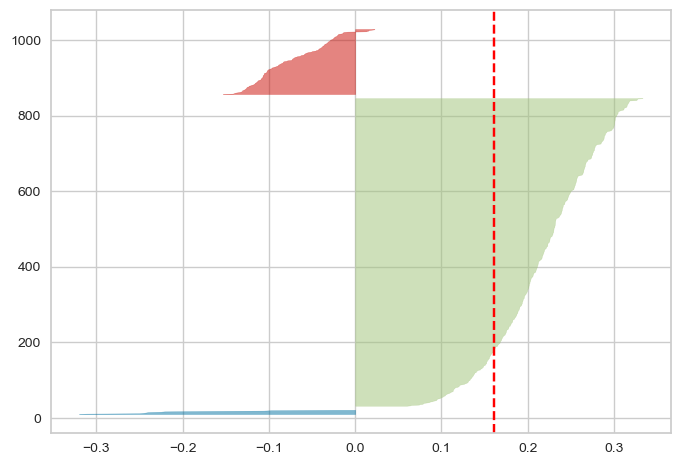

In [126]:
# kmeans-count
visualize_silhouette(bow.A,kmeans_count)

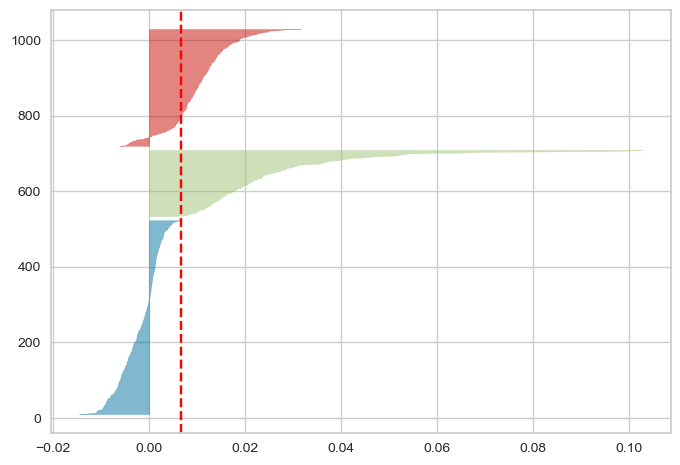

In [127]:
# kmeans-tfidf
visualize_silhouette(tfidf_val.A,kmeans_tfidf)

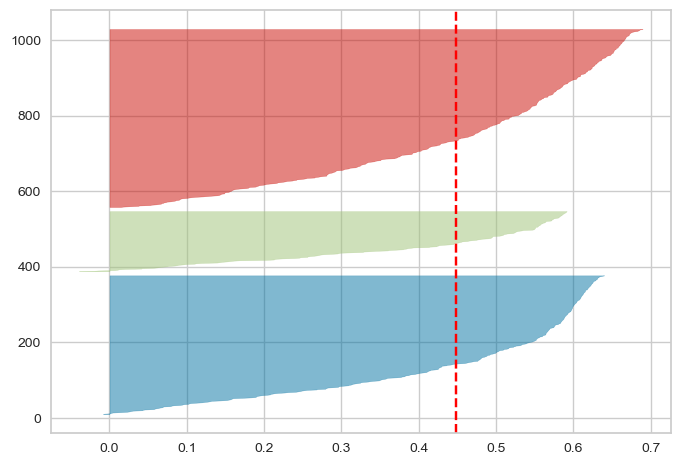

In [128]:
# kmeans-word2vec
visualize_silhouette(x_emb,kmeans_word2vec)